# Linear regression using scikit-learn

In the previous notebook, we presented the parametrization of a linear model.
During the exercise, you saw that varying parameters gives different models
that may fit better or worse the data. To evaluate quantitatively this
goodness of fit, you implemented a so-called metric.

When doing machine learning, one is interested in selecting the model which
minimizes the error on the data available the most. From the previous
exercise, we could implement a brute-force approach, varying the weights and
intercept and select the model with the lowest error.

Hopefully, this problem of finding the best parameters values (i.e. that
result in the lowest error) can be solved without the need to check every
potential parameter combination. Indeed, this problem has a closed-form
solution: the best parameter values can be found by solving an equation. This
avoids the need for brute-force search. This strategy is implemented in
scikit-learn.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/penguins_regression.csv"
penguins = pd.read_csv(url)
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

In [2]:
data.head()

,Flipper Length (mm)
0,181.0
1,186.0
2,195.0
3,193.0
4,190.0


In [6]:
target.head()

0    3750.0
1    3800.0
2    3250.0
3    3450.0
4    3650.0
Name: Body Mass (g), dtype: float64

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [3]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

The instance `linear_regression` stores the parameter values in the attributes
`coef_` and `intercept_`. We can check what the optimal model found is:

In [4]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

np.float64(49.68556640610009)

In [5]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

np.float64(-5780.831358077063)

We can use the weight and intercept to plot the model found using the
scikit-learn.

In [6]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass
)

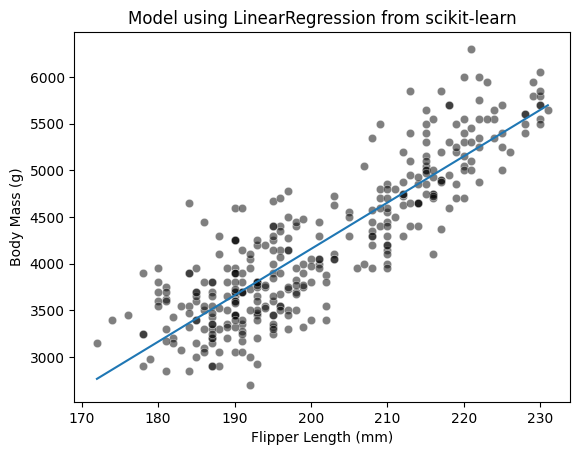

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

In the solution of the previous exercise, we implemented a function to compute
the goodness of fit of a model. Indeed, we mentioned two metrics: (i) the
[mean squared
error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)
and (ii) the [mean absolute
error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error).
Let's see how to use the implementations from scikit-learn in the following.

We can first compute the mean squared error.

In [8]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154546.19


A linear regression model minimizes the mean squared error on the training
set. This means that the parameters obtained after the fit (i.e. `coef_` and
`intercept_`) are the optimal parameters that minimizes the mean squared
error. In other words, any other choice of parameters would yield a model with
a higher mean squared error on the training set.

However, the mean squared error is difficult to interpret. The mean absolute
error is more intuitive since it provides an error in the same unit as the one
of the target.

In [9]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g


A mean absolute error of 313 means that in average, our model make an error of
± 313 grams when predicting the body mass of a penguin given its flipper
length.

In this notebook, you saw how to train a linear regression model using
scikit-learn.